In [1]:
from pandas_datareader import data as pdr
import pandas as pd
from datetime import datetime
import yfinance as yfin
yfin.pdr_override()

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from plotly import __version__
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df = pdr.get_data_yahoo("TSLA")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<Axes: xlabel='Date'>

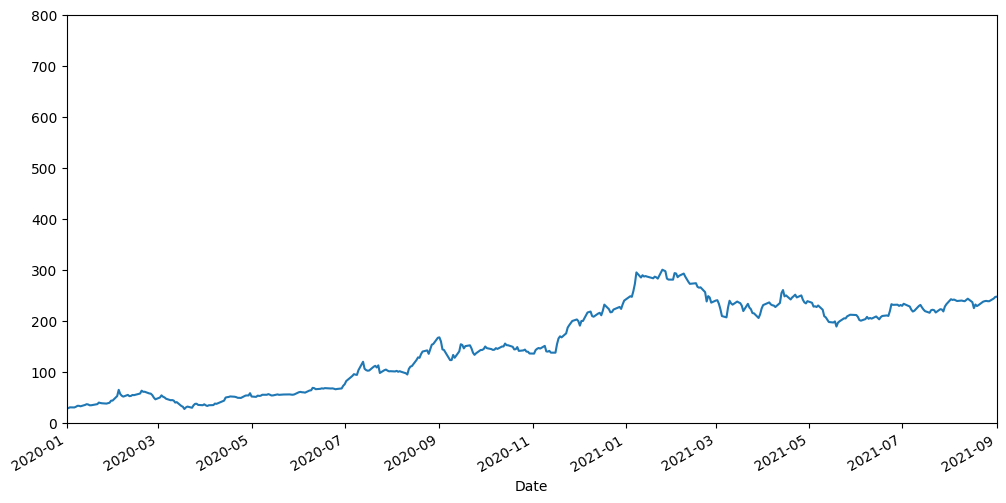

In [6]:
df['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 800], figsize=(12, 6))

In [7]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27'],
              dtype='datetime64[ns]', name='Date', length=3357, freq=None)

In [8]:
index = df.loc['2020-01-01':'2021-09-01'].index
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [9]:
share_open = df.loc['2020-01-01':'2021-09-01']['Open']

In [10]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [11]:
share_close = df.loc['2020-01-01':'2021-09-01']['Close']
share_close

Date
2020-01-02     28.684000
2020-01-03     29.534000
2020-01-06     30.102667
2020-01-07     31.270666
2020-01-08     32.809334
                 ...    
2021-08-26    233.720001
2021-08-27    237.306671
2021-08-30    243.636673
2021-08-31    245.240005
2021-09-01    244.696671
Name: Close, Length: 421, dtype: float64

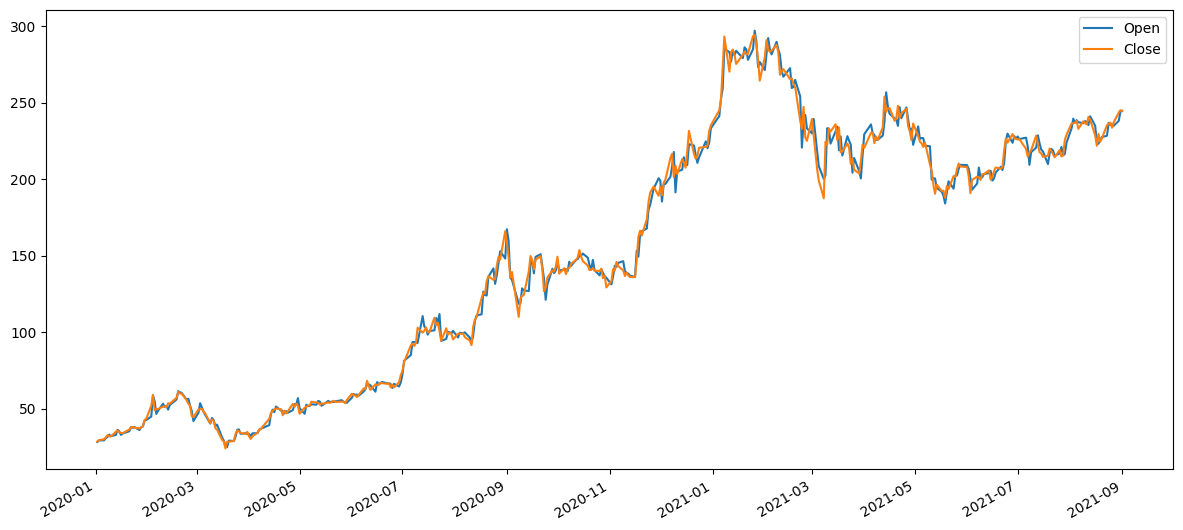

In [12]:
figure, axes = plt.subplots(figsize=(12, 6))
plt.tight_layout()
figure.autofmt_xdate()
axes.plot(index, share_open)
axes.plot(index, share_close)
plt.legend(labels=['Open', 'Close'])

D:\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



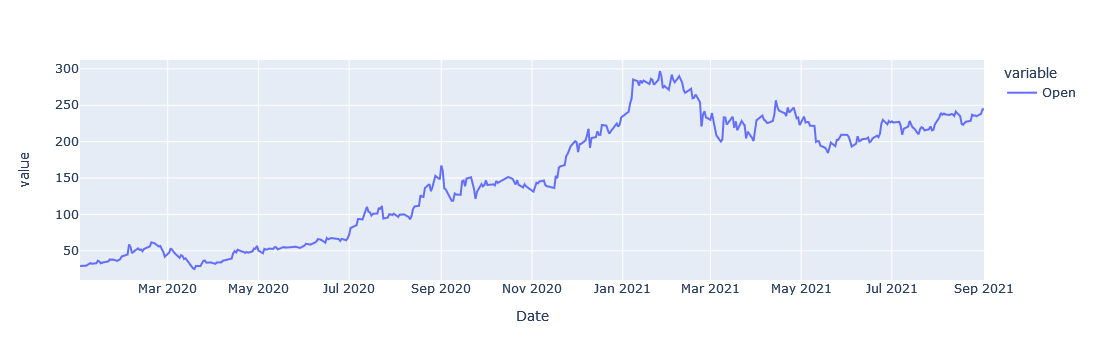

D:\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



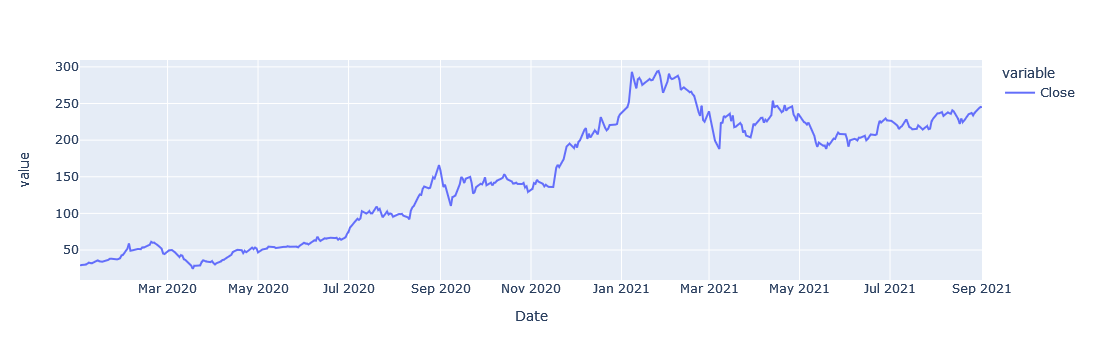

In [13]:
fig = px.line(share_open)
fig.show()
fig  = px.line(share_close)
fig.show()

In [14]:
df = df.reset_index()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3357 non-null   datetime64[ns]
 1   Open       3357 non-null   float64       
 2   High       3357 non-null   float64       
 3   Low        3357 non-null   float64       
 4   Close      3357 non-null   float64       
 5   Adj Close  3357 non-null   float64       
 6   Volume     3357 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 183.7 KB


In [16]:
df = df.set_index(df['Date'], drop=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


Time Resampling

In [17]:
df.resample(rule='A').min()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-12-31,2010-06-29,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,2011-01-03,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,2012-01-03,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2013-01-02,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,2014-01-02,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,2015-01-02,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,2016-01-04,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,2017-01-03,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,2018-01-02,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


In [18]:
df.resample(rule='A').max()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-12-31,2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


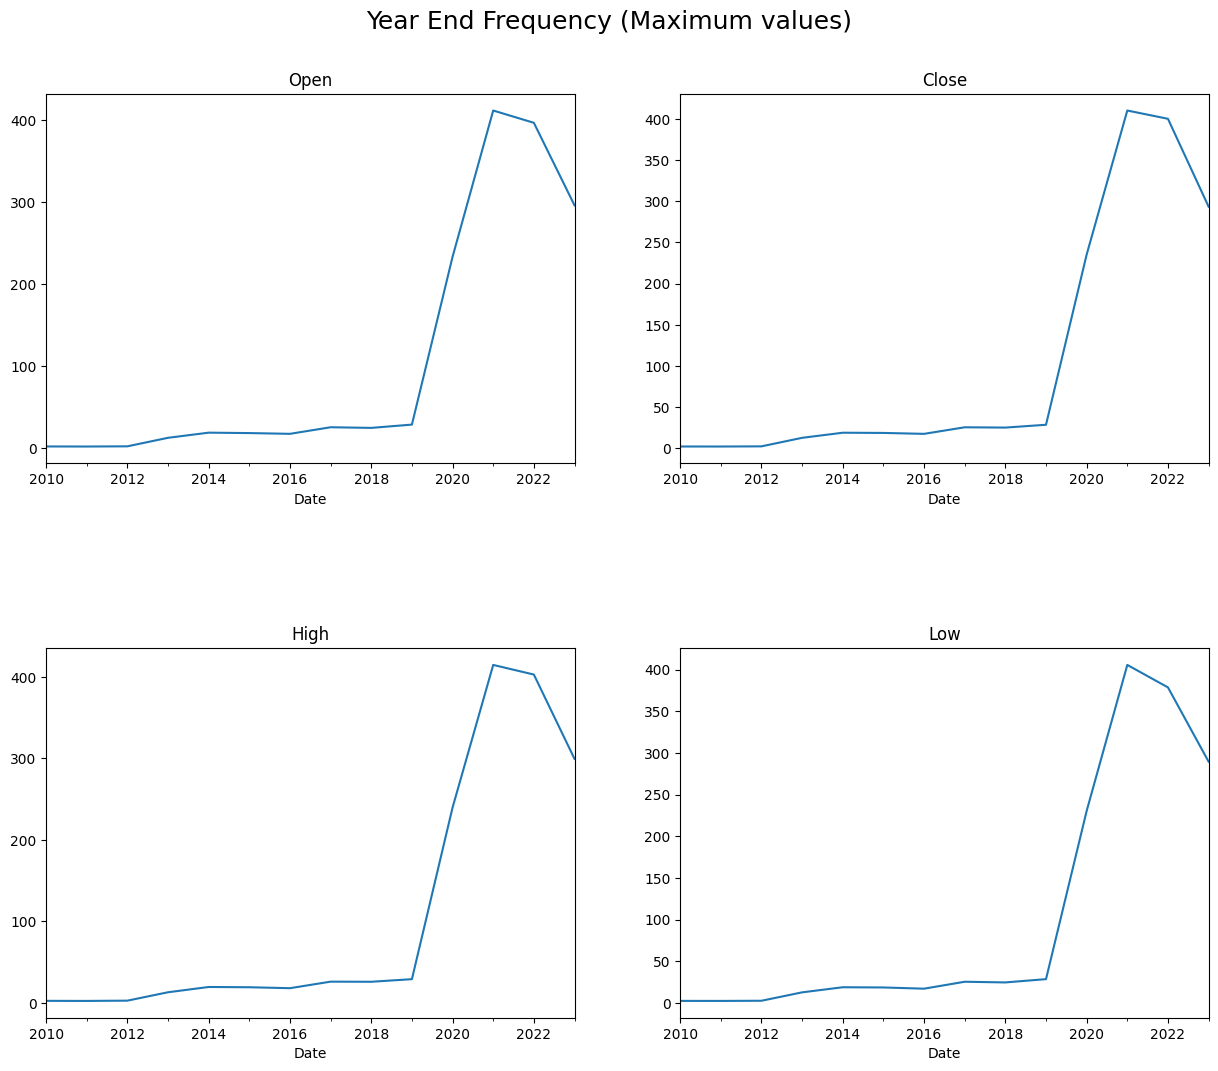

In [19]:
col_name = ['Open', 'Close', 'High','Low']
        
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Year End Frequency (Maximum values)', fontsize=18, y=0.95)

for col_name, ax in zip(col_name, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df.resample(rule='A').max()[col_name].plot(ax=ax)
    ax.set_title(col_name)

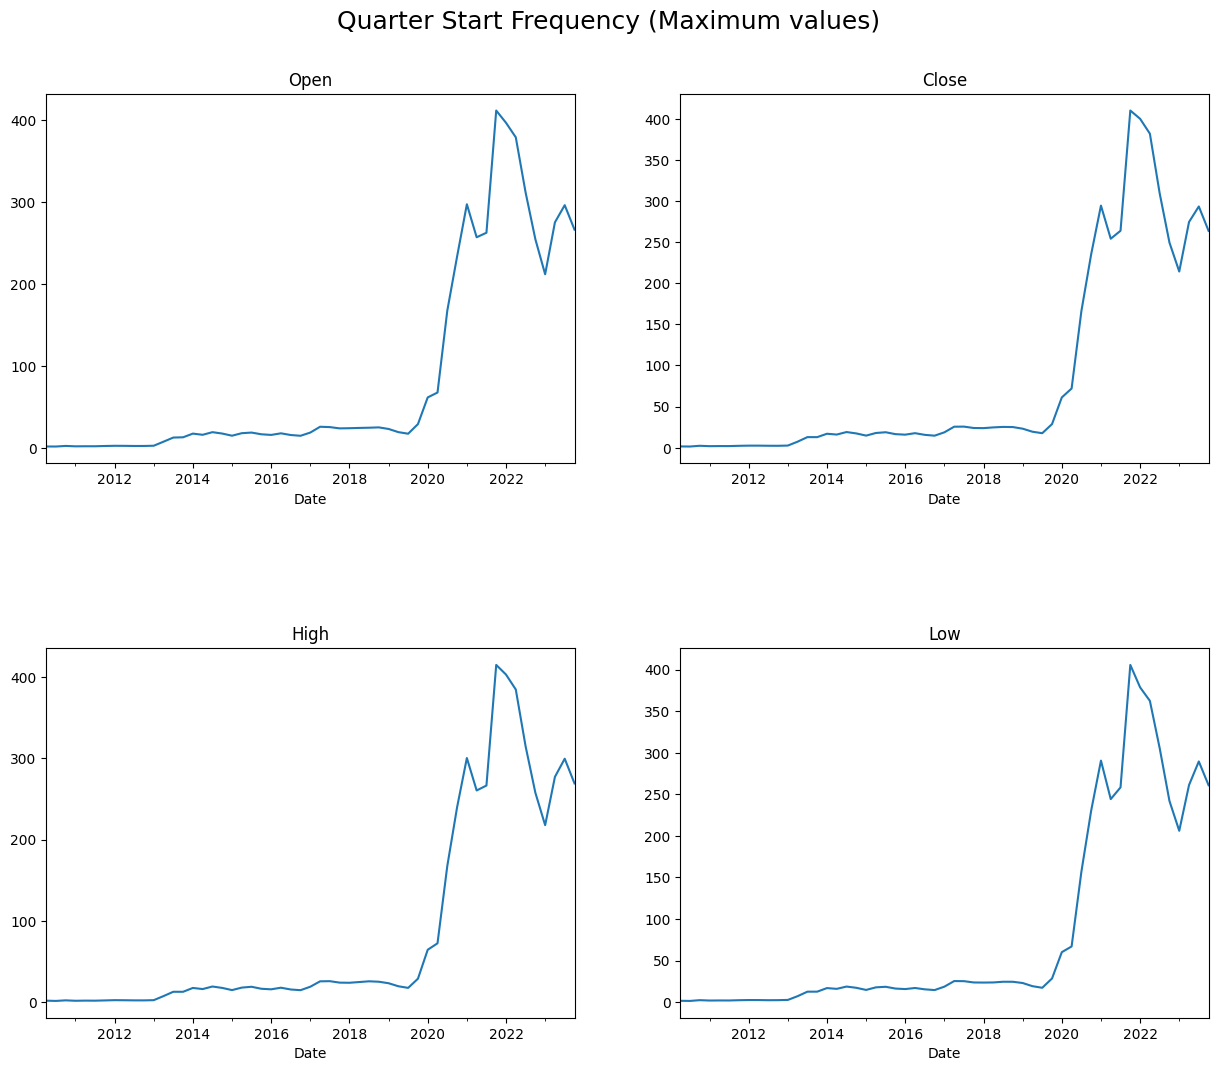

In [20]:
col_name = ['Open', 'Close', 'High','Low']
        
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Quarter Start Frequency (Maximum values)', fontsize=18, y=0.95)

for col_name, ax in zip(col_name, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df.resample(rule='QS').max()[col_name].plot(ax=ax)
    ax.set_title(col_name)

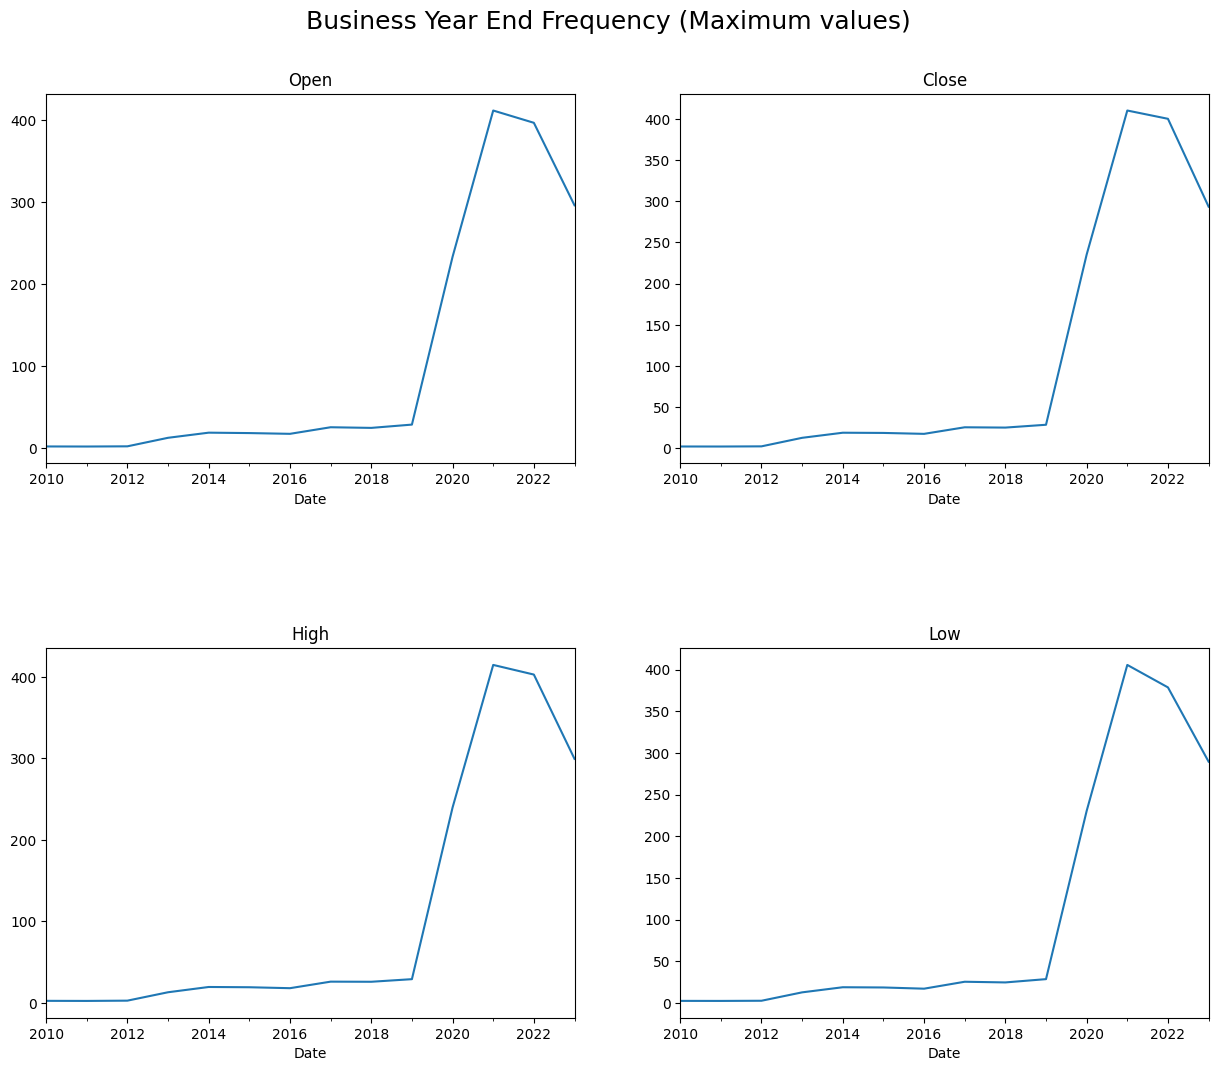

In [21]:
col_name = ['Open', 'Close', 'High','Low']
        
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Business Year End Frequency (Maximum values)', fontsize=18, y=0.95)

for col_name, ax in zip(col_name, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df.resample(rule='BA').max()[col_name].plot(ax=ax)
    ax.set_title(col_name)

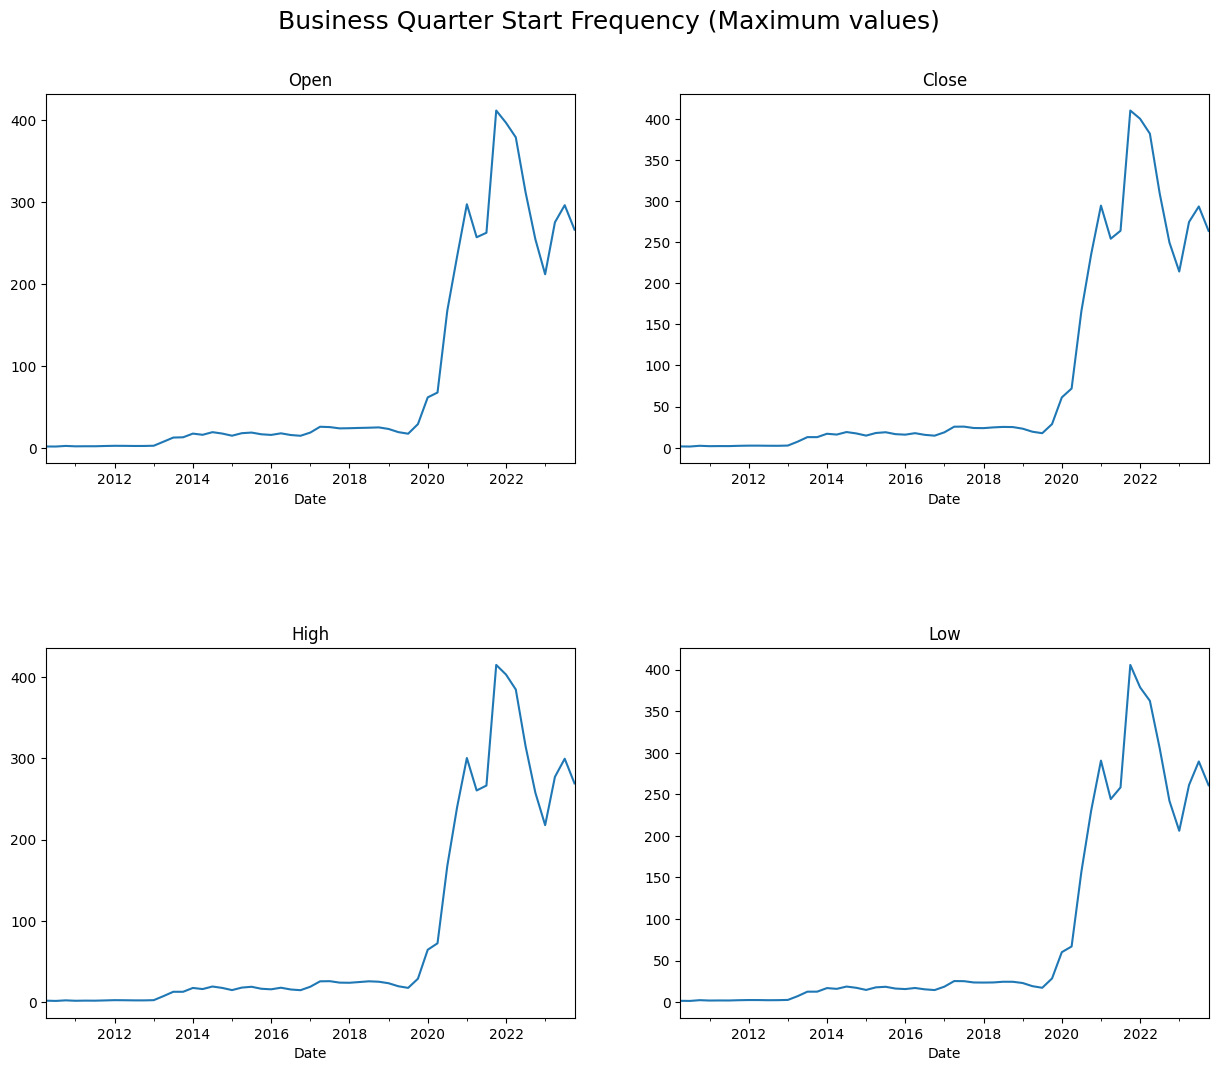

In [22]:
col_name = ['Open', 'Close', 'High','Low']
        
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Business Quarter Start Frequency (Maximum values)', fontsize=18, y=0.95)

for col_name, ax in zip(col_name, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df.resample(rule='BQS').max()[col_name].plot(ax=ax)
    ax.set_title(col_name)

Text(0.5, 1.0, 'Business Year End Frequency (Mean)')

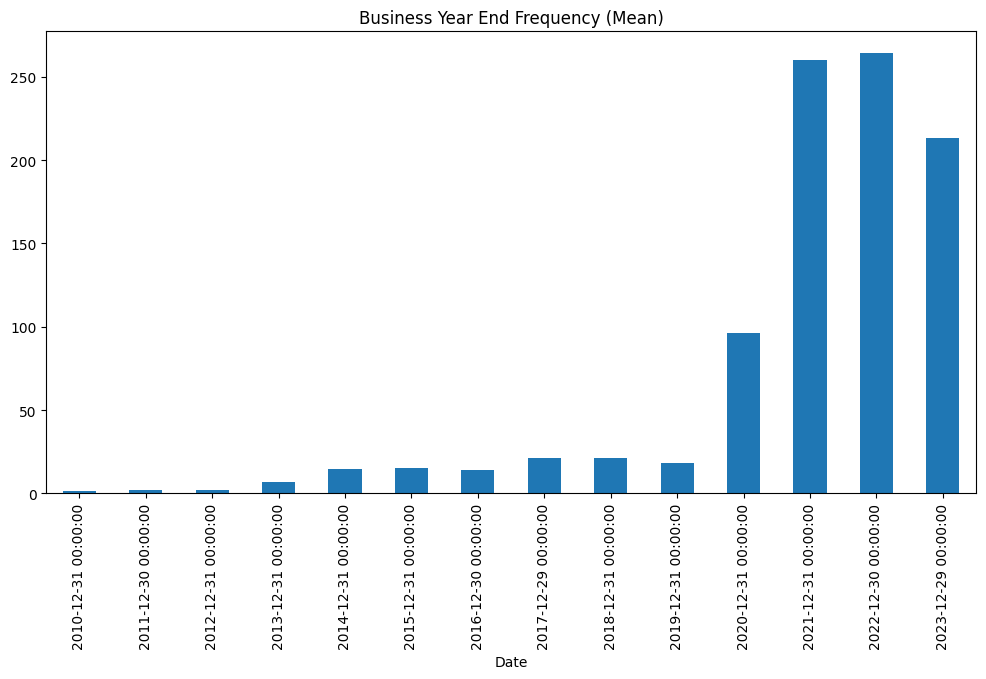

In [23]:
plt.figure(figsize=(12, 6))
df.resample(rule='BA').mean()['Open'].plot(kind='bar')
plt.title('Business Year End Frequency (Mean)')

In [24]:
start_date = pd.Timestamp('2019-01-01')
end_date = pd.Timestamp('2020-12-31')

df_monthly = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df_monthly = df_monthly.drop('Date', axis=1)
df_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
...,...,...,...,...,...,...
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400


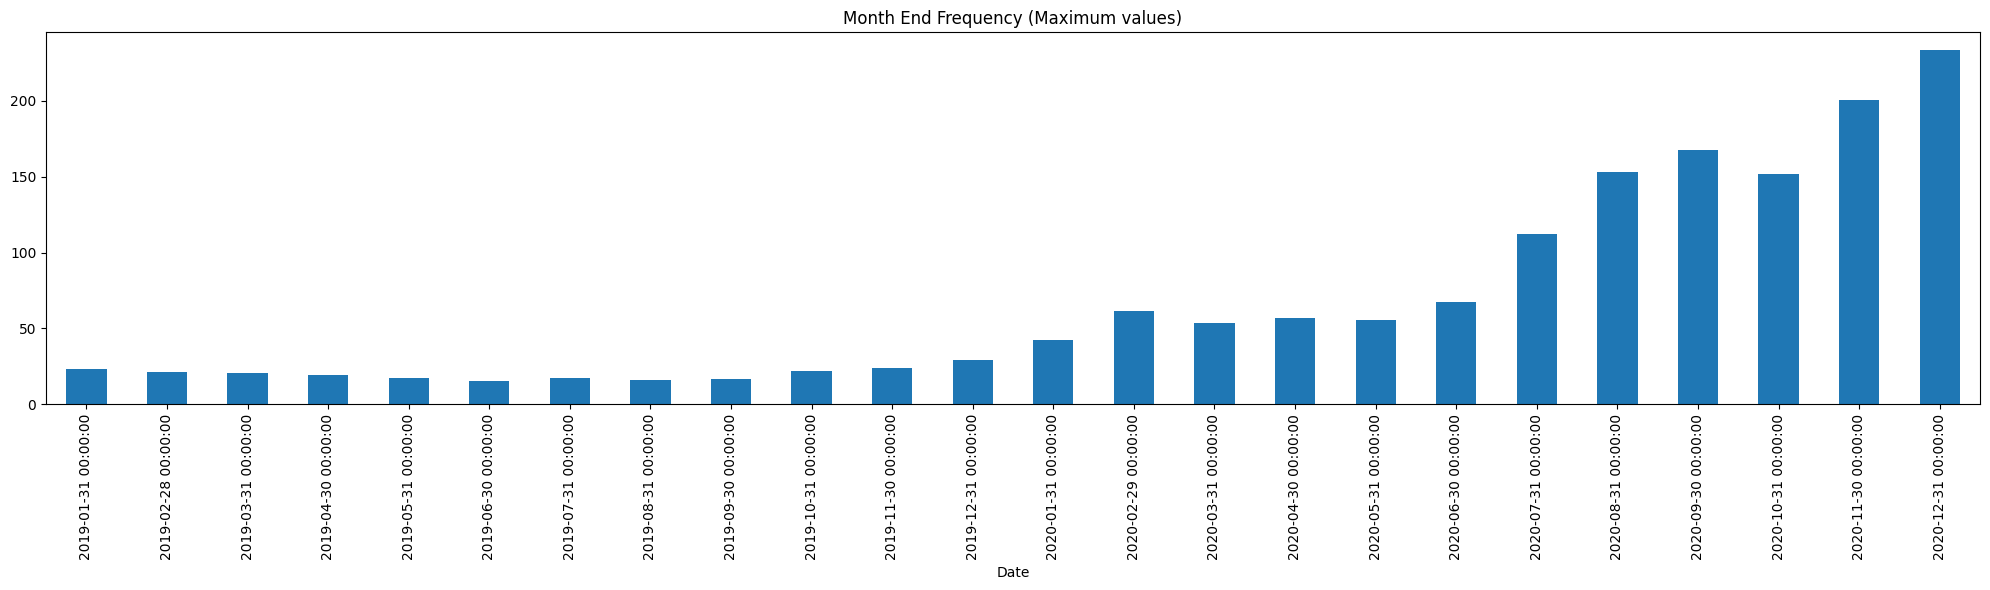

In [25]:
plt.figure(figsize=(12,6))
df_monthly.resample(rule='M').max()['Open'].plot(kind='bar', figsize=(20, 6))
plt.title('Month End Frequency (Maximum values)')
plt.tight_layout()

In [26]:
df['Open: 30 Days rolling'] = df['Open'].rolling(30).mean()

In [27]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open: 30 Days rolling
Date,,,,,,,,
2010-06-29,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN


<Axes: xlabel='Date'>

<Figure size 1200x600 with 0 Axes>

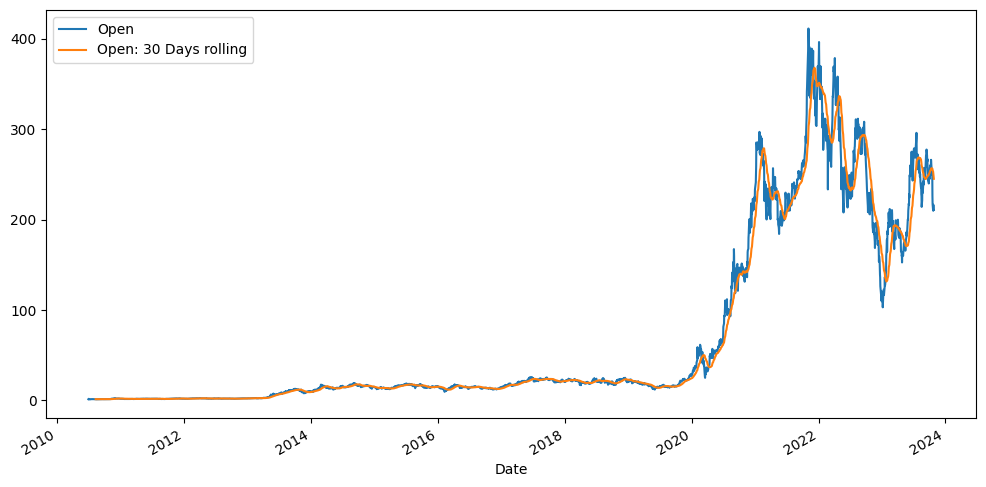

In [28]:
plt.figure(figsize=(12, 6))
df[['Open', 'Open: 30 Days rolling']].plot(figsize=(12, 6))